d:\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/80
3600/3600 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.8635 - loss: 0.2818 - val_accuracy: 0.8863 - val_loss: 0.2352
Epoch 2/80
3600/3600 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.8925 - loss: 0.2315 - val_accuracy: 0.8921 - val_loss: 0.2249
Epoch 3/80
3600/3600 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8978 - loss: 0.2230 - val_accuracy: 0.8989 - val_loss: 0.2171
Epoch 4/80
3600/3600 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9002 - loss: 0.2176 - val_accuracy: 0.9017 - val_loss: 0.2153
Epoch 5/80
3600/3600 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9008 - loss: 0.2131 - val_accuracy: 0.9014 - val_loss: 0.2127
Epoch 6/80
3600/3600 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9032 - loss: 0.2111 - val_accuracy: 0.9043 - val_loss: 0.2111
Epoch 7/80
3600/3600 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9039 - loss: 0.2095 - val_accuracy: 0.9011 - val_loss: 0.2121
Epoch 8/80
3600/3600 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.9036 - loss: 0.2085

 Đã lưu mô hình loan_model.h5


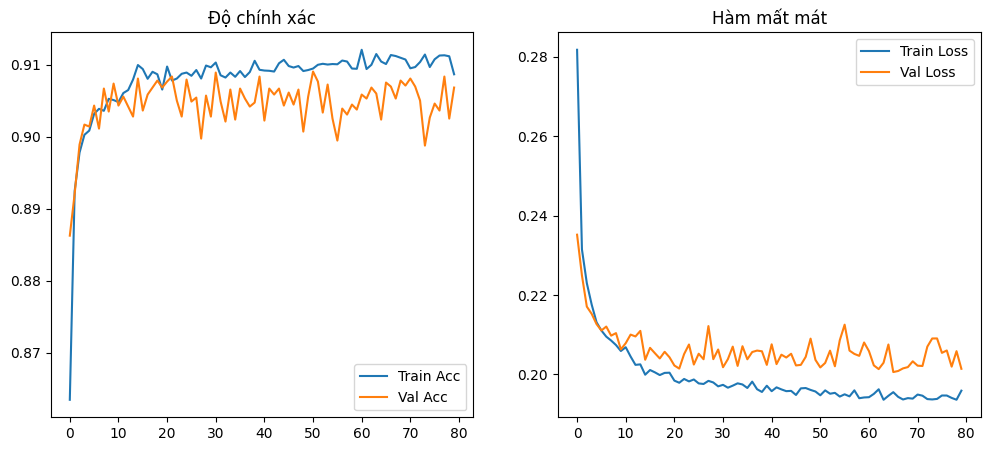

In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# 1. Tải dữ liệu
data = np.load("../split_data.npz")
X_train, X_test, y_train, y_test = data['X_train'], data['X_test'], data['y_train'], data['y_test']

# 2. Xây dựng mạng nơ-ron
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(12, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 3. Huấn luyện
history = model.fit(
    X_train, y_train,
    epochs=80,
    batch_size=8,
    validation_split=0.2,
    verbose=1
)

# 4. Lưu mô hình
model.save("../models/loan_model.h5")
print(" Đã lưu mô hình loan_model.h5")

# 5. Biểu đồ Accuracy/Loss
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend(); plt.title("Độ chính xác")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend(); plt.title("Hàm mất mát")
plt.show()


In [2]:
import numpy as np
import joblib
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Tải dữ liệu
data = np.load("../split_data.npz")
X_test, y_test = data['X_test'], data['y_test']

# 2. Load mô hình
ml_model = joblib.load("../models/best_model.pkl")
nn_model = load_model("../models/loan_model.h5")

# 3. Đánh giá ML
y_pred_ml = ml_model.predict(X_test)
acc_ml = accuracy_score(y_test, y_pred_ml)

# 4. Đánh giá NN
y_pred_nn = (nn_model.predict(X_test) > 0.5).astype(int)
acc_nn = accuracy_score(y_test, y_pred_nn)

# 5. In kết quả
print(f"🔹 ML Model Accuracy: {acc_ml:.3f}")
print(f"🔹 Neural Network Accuracy: {acc_nn:.3f}")

print("\n=== ML Classification Report ===")
print(classification_report(y_test, y_pred_ml))

print("\n=== NN Classification Report ===")
print(classification_report(y_test, y_pred_nn))


282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
🔹 ML Model Accuracy: 0.928
🔹 Neural Network Accuracy: 0.914

=== ML Classification Report ===
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      7000
           1       0.89      0.77      0.83      2000

    accuracy                           0.93      9000
   macro avg       0.91      0.87      0.89      9000
weighted avg       0.93      0.93      0.93      9000


=== NN Classification Report ===
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7000
           1       0.89      0.70      0.78      2000

    accuracy                           0.91      9000
   macro avg       0.90      0.84      0.86      9000
weighted avg       0.91      0.91      0.91      9000

